# Sneakers & Streetwear Sales Analysis & Customer Segmentation

This dataset contains streetwear and sneaker sales from Jan to Aug 2022, including details like product type, brand, gender, country, price, and payment mode. The goal is to explore product trends, customer behavior, and payment preferences through data visualization and analysis, with insights into brand popularity, regional patterns, gender distribution, and digital payment adoption over time.

### Importing libraries and Loading Data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for fundamental data visualization
import seaborn as sns # for high-level data visualization

import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sneakers-and-streetwear-sales-2022/sneakers_streetwear_sales_data.csv


In [2]:
df = pd.read_csv("/kaggle/input/sneakers-and-streetwear-sales-2022/sneakers_streetwear_sales_data.csv")

In [3]:
df.head()

,Date,Product Name,Product Type,Brand,Gender,Category,Country,Quantity,Unit Price ($),Amount ($),Payment Mode
0,2022-05-27,Fear of God Essentials Tee,T-shirt,Essentials,Unisex,Limited Edition,Japan,5,141.82,709.10,Card
1,2022-08-22,Yeezy Boost 350,Sneakers,Adidas,Unisex,Streetwear,USA,2,267.34,534.68,Cash on Delivery
2,2022-04-03,Nike Dunk Low,Sneakers,Nike,Women,Limited Edition,Germany,1,292.00,292.00,Cash on Delivery
3,2022-07-13,Nike Tech Fleece,Hoodie,Nike,Men,Limited Edition,USA,4,245.44,981.76,Cash on Delivery
4,2022-08-25,Jordan 1 High,Sneakers,Nike,Women,Casual,Australia,2,184.51,369.02,Cash on Delivery


### Data Pre-processing

In [4]:
df.shape

(353, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            353 non-null    object 
 1   Product Name    353 non-null    object 
 2   Product Type    353 non-null    object 
 3   Brand           353 non-null    object 
 4   Gender          353 non-null    object 
 5   Category        353 non-null    object 
 6   Country         353 non-null    object 
 7   Quantity        353 non-null    int64  
 8   Unit Price ($)  353 non-null    float64
 9   Amount ($)      353 non-null    float64
 10  Payment Mode    353 non-null    object 
dtypes: float64(2), int64(1), object(8)
memory usage: 30.5+ KB


In [6]:
df.describe()

,Quantity,Unit Price ($),Amount ($)
count,353.000000,353.000000,353.000000
mean,3.107649,174.607054,547.034193
std,1.408083,71.625710,343.084461
min,1.000000,50.100000,50.100000
25%,2.000000,113.750000,268.780000
50%,3.000000,175.510000,494.400000
75%,4.000000,235.500000,783.930000
max,5.000000,299.730000,1496.500000


In [7]:
print("Null values: ",df.isnull().sum())
print("Duplicate values: ",df.duplicated().sum())

Null values:  Date              0
Product Name      0
Product Type      0
Brand             0
Gender            0
Category          0
Country           0
Quantity          0
Unit Price ($)    0
Amount ($)        0
Payment Mode      0
dtype: int64
Duplicate values:  0


There are no null or duplicated values.<br>
But to make analytical process smoother, we'll change the datatype of column 'Date'- {object to date}


In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df.dtypes

Date              datetime64[ns]
Product Name              object
Product Type              object
Brand                     object
Gender                    object
Category                  object
Country                   object
Quantity                   int64
Unit Price ($)           float64
Amount ($)               float64
Payment Mode              object
dtype: object

### EDA

Starting with basic EDA

In [10]:
# Total Revenue in Sneaker & Streetwear Sales
print("Total revenue:",df['Amount ($)'].sum())

Total revenue: 193103.07


In [11]:
# Which Brand made the most transactions/purchases
print(df['Brand'].value_counts().idxmax(),"made the most purchases.")

Nike made the most purchases.


In [12]:
# Which Brand made the highest revenue
print(df.groupby('Brand')['Amount ($)'].sum().idxmax(),"made the highest revenue.")

Nike made the highest revenue.


Basic Data Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

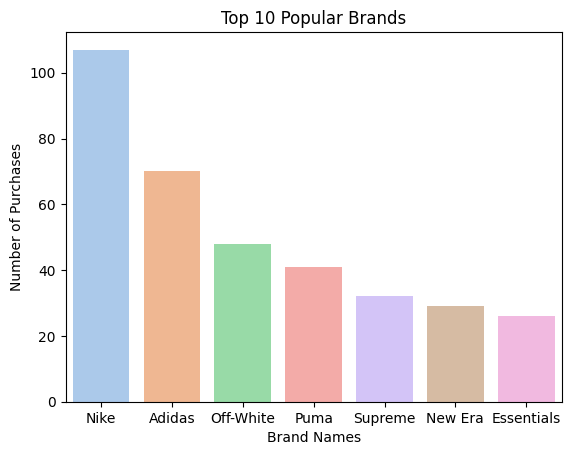

In [13]:
# Top 10 Popular Brands
brand_values = df['Brand'].value_counts()
sns.barplot(x=brand_values.index,y=brand_values.values,palette='pastel')
plt.xlabel("Brand Names")
plt.ylabel("Number of Purchases")
plt.title("Top 10 Popular Brands")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

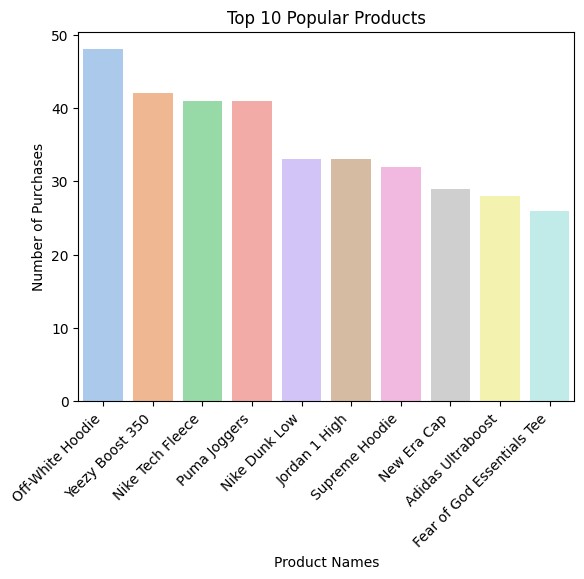

In [14]:
# Top 10 Products
product_values = df['Product Name'].value_counts().head(10)
sns.barplot(x=product_values.index,y=product_values.values,palette='pastel')
plt.xlabel("Product Names")
plt.ylabel("Number of Purchases")
plt.title("Top 10 Popular Products")
plt.xticks(rotation=45, ha='right')
plt.show

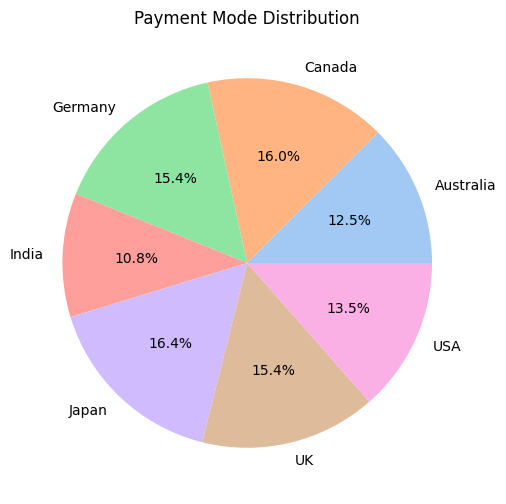

In [15]:
# Payment Mode Distribution among Countries
countries = df.groupby('Country')['Amount ($)'].sum()
plt.figure(figsize=(6, 6))
plt.pie(countries.values, labels=countries.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title("Payment Mode Distribution")
plt.show()

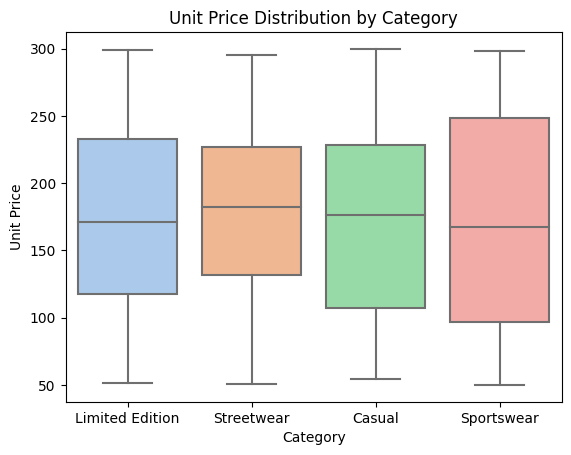

In [16]:
# Unit Price Distribution by Category 
sns.boxplot(data=df, x='Category', y='Unit Price ($)', palette='pastel')
plt.xlabel('Category')
plt.ylabel('Unit Price')
plt.title('Unit Price Distribution by Category')
plt.show()

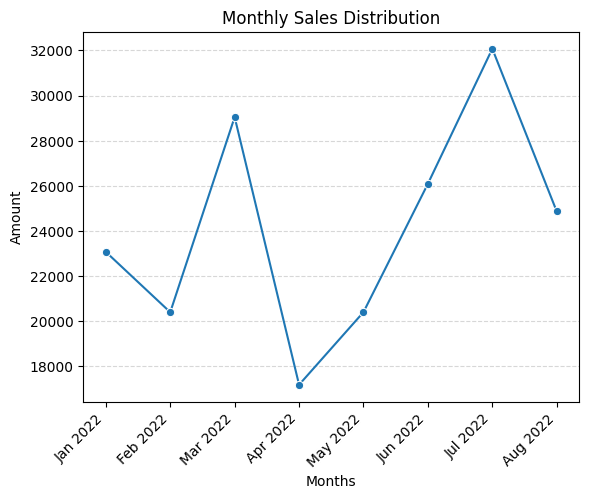

In [17]:
# Sales over time distribution
df['Month_dt'] = df['Date'].dt.to_period('M').dt.to_timestamp()
monthly_sales = df.groupby('Month_dt')['Amount ($)'].sum()
sns.lineplot(x=monthly_sales.index.strftime('%b %Y'), y=monthly_sales.values, marker='o')
plt.xlabel('Months')
plt.ylabel('Amount')
plt.title('Monthly Sales Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=45, ha='right')
plt.show()

Advance Data Visualization

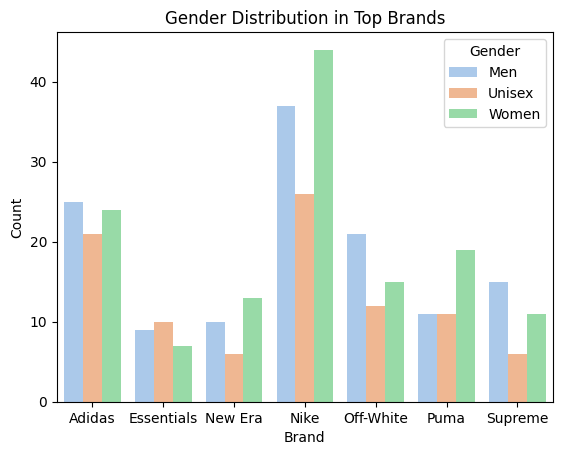

In [18]:
# Gender Distribution in Top Brands
brand_gender = df.groupby(['Brand', 'Gender']).size().reset_index(name='Count')
sns.barplot(data=brand_gender, x='Brand', y='Count', hue='Gender', palette='pastel')
plt.title('Gender Distribution in Top Brands')
plt.show()
# shows which brand is popular among which gender

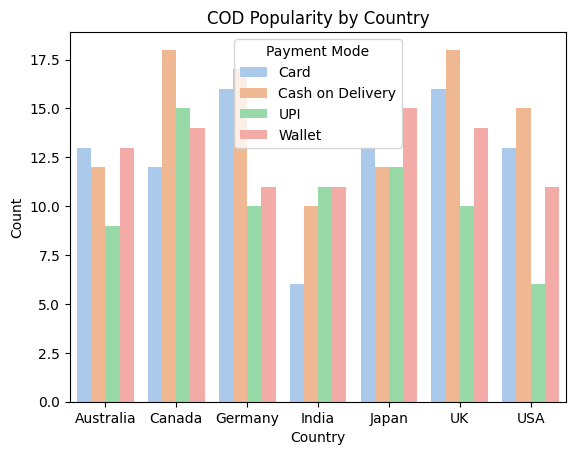

In [19]:
# COD Popularity by Country
country_payments = df.groupby(['Country', 'Payment Mode']).size().reset_index(name='Count')
sns.barplot(data=country_payments, x='Country', y='Count', hue='Payment Mode', palette='pastel')
plt.title('COD Popularity by Country')
plt.show()

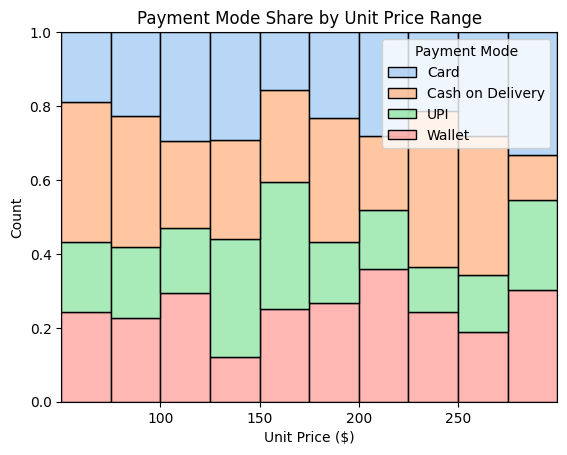

In [20]:
# Payment Mode Share by Unit Price Range (to get a threshold by which users started shifting from COD to Card)
sns.histplot(data=df, x='Unit Price ($)', hue='Payment Mode', bins=10, multiple='fill', palette='pastel')
plt.title("Payment Mode Share by Unit Price Range")
plt.show()

There is no strong shift toward card at a specific price threshold, users use a mix of payment modes across all price levels.

# Customer Segmentation

In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# selecting features
features = ['Quantity','Unit Price ($)','Amount ($)','Payment Mode','Product Type','Brand','Category']
df_seg = df[features].copy()

# encoding categorical variables
for col in ['Payment Mode','Product Type','Brand','Category']:
    df_seg[col] = LabelEncoder().fit_transform(df_seg[col])

# scaling data
scalar = StandardScaler()
df_scaled = scalar.fit_transform(df_seg)

In [22]:
df_scaled[0] #scaled data

array([ 1.34582813, -0.45840514,  0.47304926, -1.30136009,  1.6989896 ,
       -0.96457636, -0.3978675 ])

Elbow method to choose optimal number of k clusters

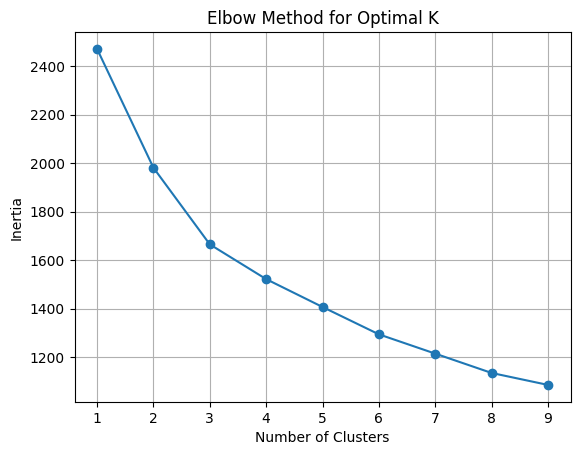

In [23]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.grid()
plt.show()

The curve is starting to get flattened at k=3. So the optimal value should be k=3.

In [24]:
# fitting kmeans to our data
kmeans = KMeans(n_clusters=3, random_state=0)
df['Customer Segment'] = kmeans.fit_predict(df_scaled)

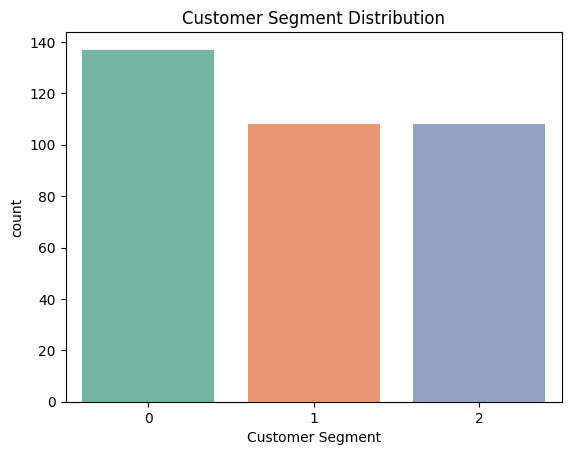

In [25]:
# visualizing balance of clusters in data
sns.countplot(x='Customer Segment', data=df, palette='Set2')
plt.title("Customer Segment Distribution")
plt.show()

Checking mean values to separate clusters

In [26]:
df.groupby('Customer Segment')[['Quantity', 'Unit Price ($)', 'Amount ($)']].mean()

,Quantity,Unit Price ($),Amount ($)
Customer Segment,,,
0,2.598540,145.148029,343.704745
1,2.666667,153.604722,386.647685
2,4.194444,232.978704,965.347870


## Segmenting clusters into labels<br>
- 0 for "Mid-Tier Buyers"<br>
- 1 for "Budget Streetwear Buyers"<br>
- 2 for "High-Value Buyers"

In [27]:
segment_labels = {
    0: "Mid-Tier Buyers",
    1: "Budget Streetwear Buyers",
    2: "High-Value Buyers"
}

df['Segment Label'] = df['Customer Segment'].map(segment_labels)

### Analysing Segments Behavior

In [28]:
# which payment mode is owned by which customer segment
df.groupby('Segment Label')['Payment Mode'].value_counts(normalize=True)

Segment Label             Payment Mode    
Budget Streetwear Buyers  Cash on Delivery    0.305556
                          Card                0.296296
                          UPI                 0.212963
                          Wallet              0.185185
High-Value Buyers         Wallet              0.370370
                          Card                0.259259
                          Cash on Delivery    0.222222
                          UPI                 0.148148
Mid-Tier Buyers           Cash on Delivery    0.328467
                          UPI                 0.248175
                          Card                0.211679
                          Wallet              0.211679
Name: proportion, dtype: float64

In [29]:
# which brand is owned by which customer segment
df.groupby('Segment Label')['Brand'].value_counts(normalize=True)

Segment Label             Brand     
Budget Streetwear Buyers  Adidas        0.527778
                          Nike          0.268519
                          Essentials    0.203704
High-Value Buyers         Nike          0.462963
                          Off-White     0.138889
                          Adidas        0.120370
                          Puma          0.120370
                          New Era       0.064815
                          Supreme       0.055556
                          Essentials    0.037037
Mid-Tier Buyers           Off-White     0.240876
                          Nike          0.204380
                          Puma          0.204380
                          Supreme       0.189781
                          New Era       0.160584
Name: proportion, dtype: float64

In [30]:
# which category is owned by which customer segment
df.groupby('Segment Label')['Category'].value_counts(normalize=True)

Segment Label             Category       
Budget Streetwear Buyers  Casual             0.287037
                          Limited Edition    0.250000
                          Sportswear         0.250000
                          Streetwear         0.212963
High-Value Buyers         Streetwear         0.314815
                          Casual             0.296296
                          Limited Edition    0.212963
                          Sportswear         0.175926
Mid-Tier Buyers           Casual             0.262774
                          Limited Edition    0.255474
                          Streetwear         0.255474
                          Sportswear         0.226277
Name: proportion, dtype: float64

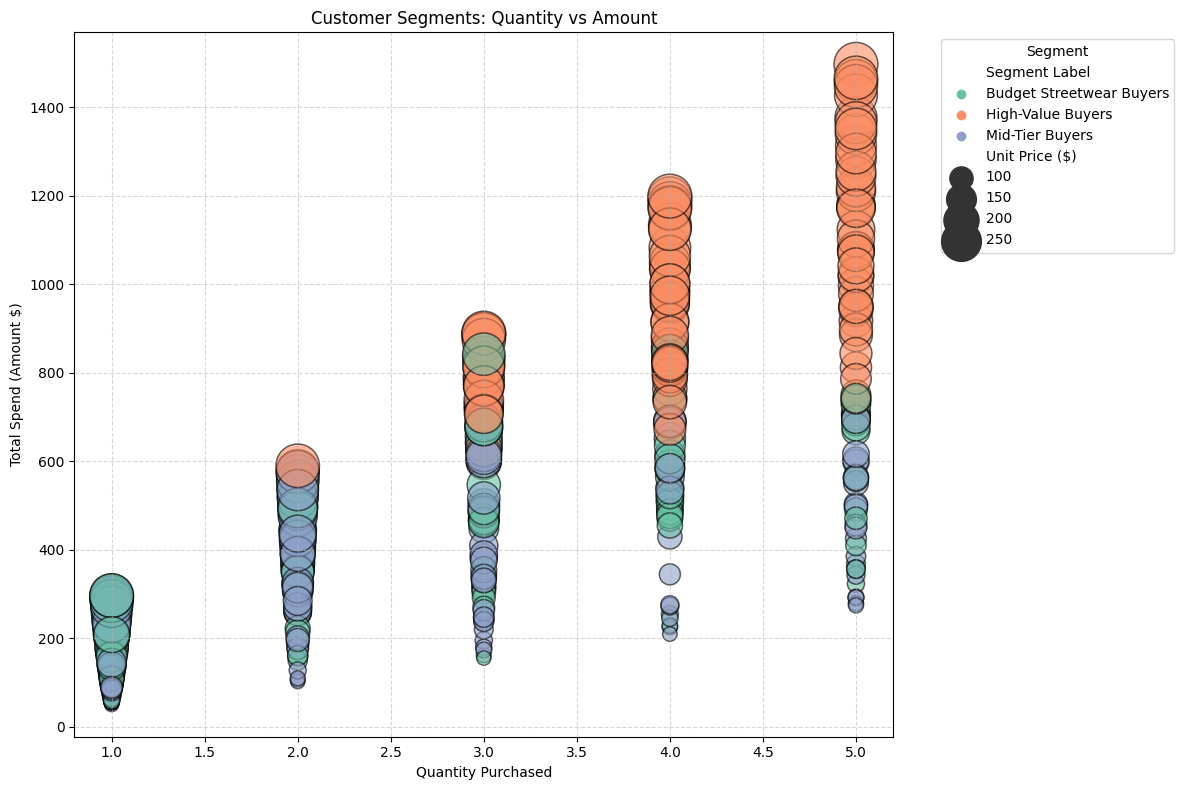

In [31]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Quantity', y='Amount ($)', hue='Segment Label', size='Unit Price ($)',sizes=(100, 1000), palette='Set2',alpha=0.6,edgecolor='black')

plt.title('Customer Segments: Quantity vs Amount')
plt.xlabel('Quantity Purchased')
plt.ylabel('Total Spend (Amount $)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Segment')
plt.tight_layout()
plt.show()